## **Case study: How does a bike-share navigate speedy success?**
<p align="center">
  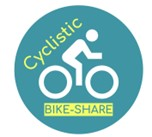

---

# **Introduction**
Welcome to the Cyclistic bike-share analysis case study. Cyclistic is a fictional bike-share program that features more than 5,800 bicycles and 600
docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use the bikes to commute to work each day.

# **About the company**
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno(The director of marketing and manager) believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a solid opportunity to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

# **The steps of the data analysis process:**

#1.	Ask
#2.	Prepare
#3.	Process
#4.	Analyze
#5.	Share
#6.	Act






# **Ask**
Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

# **Prepare**
Using Cyclistic’s historical trip data to analyze and identify trends. [Download the previous 12 months of Cyclistic trip data here](https://divvy-tripdata.s3.amazonaws.com/index.html). (Note: The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the datasets are appropriate and will enable you to answer the business questions. The data has been made available by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement).) This is public data that you can use to explore how different customer types are using Cyclistic bikes. But note that data-privacy issues prohibit you from using riders’ personally identifiable information. This means that you won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.


# **Process**
**Data Source**

For this analysis, I sourced the dataset from the Prepare Phase.

**Tools and Platform**

The analysis was conducted using Python programming language in a Jupyter Notebook environment hosted on Google Colab. Google Colab offers a cloud-based workspace, facilitating the writing and execution of Python code interactively within a notebook format. This platform eliminates the need for local software installations, streamlining the data analysis and visualization process.

**Data Loading and Analysis**

The dataset was loaded into a Pandas DataFrame after importing the requisite Python libraries. Pandas, a versatile data manipulation and analysis library, was employed for reading diverse data formats, data cleaning, preprocessing, and executing comprehensive data analysis. This enabled the extraction of meaningful insights and facilitated the visualization of various patterns and trends inherent in the dataset.

In [40]:
#importing the required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For this analysis, I utilized the data spanning 12 months from the year 2023. The data was organized on a monthly basis, To evaluate the entire year's trends, I merged all monthly datasets into a single file.

In [42]:
# path containing CSV files
csv_folder_path = '/content/drive/My Drive/Cyclistic bike-share analysis case study/'

# List all CSV files in the directory
csv_files = [file for file in os.listdir(csv_folder_path) if file.endswith('.csv')]

# Created an empty list to store DataFrames
dfs = []

# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    file_path = os.path.join(csv_folder_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenated all DataFrames in the list
merged_df = pd.concat(dfs, ignore_index=True)

In [43]:
# the merged DataFrame
merged_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


# **Analyze**
Now, data is stored appropriately and has been prepared for analysis.


In [44]:
# no. of columns and rows in dataset
merged_df.shape

(5719877, 13)

In [45]:
# Information about dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB


As we can see that '**started_at**' and '**ended_at**' columns are currently stored as object data types. To facilitate accurate date and time analysis, these columns should be converted to datetime data types.

In [46]:
# Convert 'started_at' and 'ended_at' to datetime data type
merged_df['started_at'] = pd.to_datetime(merged_df['started_at'])
merged_df['ended_at'] = pd.to_datetime(merged_df['ended_at'])


In [47]:
#after converting datatypes
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 567.3+ MB


To find out how long each ride lasted, I subtracted the '**started_at**' time from the '**ended_at**' time. Then, I converted the result into minutes and stored it in a new column called '**ride_length_minutes**'.

In [48]:
# ride length in minutes
merged_df['ride_length_minutes'] = (merged_df['ended_at'] - merged_df['started_at']).dt.total_seconds() / 60

In [49]:
# Updated DataFrame with ride length in minutes
print(merged_df[['started_at', 'ended_at', 'ride_length_minutes']])


                 started_at            ended_at  ride_length_minutes
0       2023-01-21 20:05:42 2023-01-21 20:16:33            10.850000
1       2023-01-10 15:37:36 2023-01-10 15:46:05             8.483333
2       2023-01-02 07:51:57 2023-01-02 08:05:11            13.233333
3       2023-01-22 10:52:58 2023-01-22 11:01:44             8.766667
4       2023-01-12 13:58:01 2023-01-12 14:13:20            15.316667
...                     ...                 ...                  ...
5719872 2023-12-07 13:15:24 2023-12-07 13:17:37             2.216667
5719873 2023-12-08 18:42:21 2023-12-08 18:45:56             3.583333
5719874 2023-12-05 14:09:11 2023-12-05 14:13:01             3.833333
5719875 2023-12-02 21:36:07 2023-12-02 21:53:45            17.633333
5719876 2023-12-11 13:07:46 2023-12-11 13:11:24             3.633333

[5719877 rows x 3 columns]


In [50]:
# Descriptive Statistics of dataset
merged_df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_length_minutes
count,5719877,5719877,5.719877e+06,5.719877e+06,5.712887e+06,5.712887e+06,5.719877e+06
mean,2023-07-16 10:27:50.017874688,2023-07-16 10:46:00.177127168,4.190288e+01,-8.764704e+01,4.190322e+01,-8.764720e+01,1.816932e+01
min,2023-01-01 00:01:58,2023-01-01 00:02:41,4.163000e+01,-8.794000e+01,0.000000e+00,-8.816000e+01,-1.665652e+04
25%,2023-05-21 12:50:44,2023-05-21 13:14:09,4.188096e+01,-8.766000e+01,4.188103e+01,-8.766027e+01,5.416667e+00
50%,2023-07-20 18:02:50,2023-07-20 18:19:47,4.189902e+01,-8.764403e+01,4.190000e+01,-8.764410e+01,9.533333e+00
75%,2023-09-16 20:08:49,2023-09-16 20:28:10,4.193000e+01,-8.762991e+01,4.193000e+01,-8.763000e+01,1.691667e+01
max,2023-12-31 23:59:38,2024-01-01 23:50:51,4.207000e+01,-8.746000e+01,4.218000e+01,0.000000e+00,9.848907e+04
std,NaN,NaN,4.505556e-02,2.733412e-02,5.444371e-02,6.919621e-02,1.808430e+02


In [51]:
# Checking for Missing Values
merged_df.isnull().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name     875716
start_station_id       875848
end_station_name       929202
end_station_id         929343
start_lat                   0
start_lng                   0
end_lat                  6990
end_lng                  6990
member_casual               0
ride_length_minutes         0
dtype: int64

 Here's the columns with missing values **start_station_name, start_station_id, end_station_name, end_station_id, end_lat, end_lng.**

Now, Removing rows with missing values

In [52]:
# Remove rows with missing values
merged_df.dropna(subset=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'end_lat', 'end_lng'], inplace=True)


In [53]:
# after removing rows with missing values
merged_df.isnull().sum()

ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name       0
end_station_id         0
start_lat              0
start_lng              0
end_lat                0
end_lng                0
member_casual          0
ride_length_minutes    0
dtype: int64

Calculating the **day of the week** for each bike ride using the '**started_at**' timestamp. Then, Counting the number of rides for each day of the week to understand the ride frequency.

In [54]:
# Calculating day of the week people ride bikes
merged_df['day_of_week'] = merged_df['started_at'].dt.day_name()

# Count the number of rides for each day of the week
ride_counts_by_day = merged_df['day_of_week'].value_counts()

print("Number of rides by day of the week:")
print(ride_counts_by_day)


Number of rides by day of the week:
day_of_week
Saturday     660811
Thursday     651591
Wednesday    635813
Tuesday      630387
Friday       628376
Sunday       562631
Monday       562098
Name: count, dtype: int64


In [55]:
# updated dataset
merged_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_minutes,day_of_week
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,10.850000,Saturday
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.483333,Tuesday
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,13.233333,Monday
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.766667,Sunday
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,15.316667,Thursday


In [56]:
# updated dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4331707 entries, 0 to 5719876
Data columns (total 15 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ride_id              object        
 1   rideable_type        object        
 2   started_at           datetime64[ns]
 3   ended_at             datetime64[ns]
 4   start_station_name   object        
 5   start_station_id     object        
 6   end_station_name     object        
 7   end_station_id       object        
 8   start_lat            float64       
 9   start_lng            float64       
 10  end_lat              float64       
 11  end_lng              float64       
 12  member_casual        object        
 13  ride_length_minutes  float64       
 14  day_of_week          object        
dtypes: datetime64[ns](2), float64(5), object(8)
memory usage: 528.8+ MB


Comparing the ride frequency between **annual members** and **casual riders**. Then counting the number of rides for each member type to analyze the difference in usage patterns.

In [57]:
# frequency of rides between annual members and casual riders
ride_frequency = merged_df.groupby('member_casual')['ride_id'].count()
print(ride_frequency)

member_casual
casual    1531757
member    2799950
Name: ride_id, dtype: int64


# **Share**
Supporting visualizations and key findings.

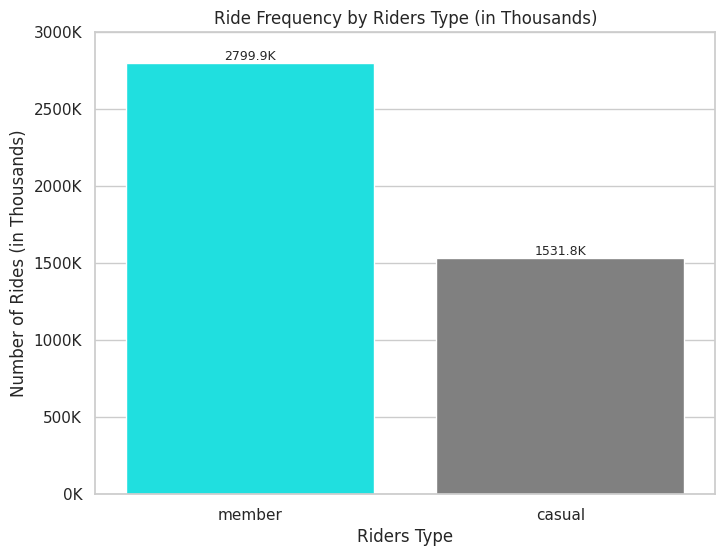

In [58]:
# Calculating ride frequency by riders type
ride_frequency = merged_df['member_casual'].value_counts()

# Converting ride frequency to thousands
ride_frequency_thousands = ride_frequency / 1000

# Creating a bar plot with different colors for each riders type
plt.figure(figsize=(8, 6))
sns.barplot(x=ride_frequency_thousands.index, y=ride_frequency_thousands.values, hue=ride_frequency_thousands.index, palette={'member': 'cyan', 'casual': 'gray'}, dodge=False)
plt.title('Ride Frequency by Riders Type (in Thousands)')
plt.xlabel('Riders Type')
plt.ylabel('Number of Rides (in Thousands)')

# Format y-axis labels to represent values in thousands
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(y)}K' for y in plt.yticks()[0]])

# Adding data labels on top of bars
for i, value in enumerate(ride_frequency_thousands):
    plt.text(i, value + 0.1, f"{value:.1f}K", ha='center', va='bottom', fontsize=9)

plt.show()


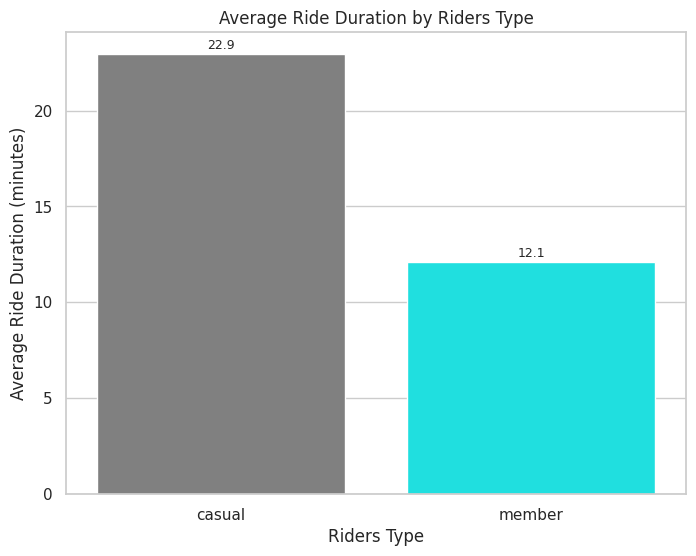

In [59]:
# Calculating average ride duration by riders type
ride_duration = merged_df.groupby('member_casual')['ride_length_minutes'].mean()

# custom colors for 'member' and 'casual'
colors = {'member': 'cyan', 'casual': 'gray'}

# Creating a bar plot with custom colors
plt.figure(figsize=(8, 6))
sns.barplot(x=ride_duration.index, y=ride_duration.values, hue=ride_duration.index, palette=colors, dodge=False)
plt.title('Average Ride Duration by Riders Type')
plt.xlabel('Riders Type')
plt.ylabel('Average Ride Duration (minutes)')

# Adding data labels
for i, value in enumerate(ride_duration):
    plt.text(i, value + 0.1, f"{value:.1f}", ha='center', va='bottom', fontsize=9)

plt.show()

In [60]:
ride_duration = merged_df.groupby('member_casual')['ride_length_minutes'].mean()
print(ride_duration)

member_casual
casual    22.936212
member    12.130941
Name: ride_length_minutes, dtype: float64


These Graphs gives us a clear understanding of the **usage patterns between casual riders and annual members.**

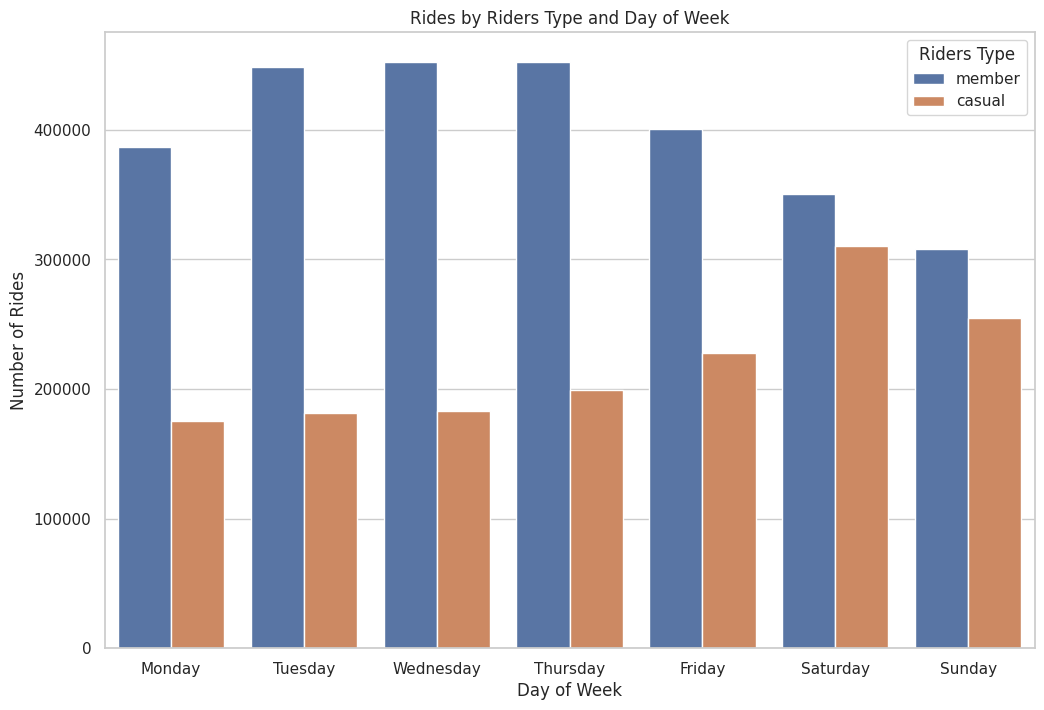

In [61]:
# Defining the order of days of the week in ascending order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Graph for rides by user type and day of week
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_df, x='day_of_week', hue='member_casual', order=days_order)
plt.title('Rides by Riders Type and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.legend(title='Riders Type')
plt.show()

Here we can see that Casual riders tend to use the bikes for fun on weekends, while members use them mainly for daily work commutes.

Another new column named '**hour_of_day**' is created to store the hour (in 24-hour format) extracted from the '**started_at**' timestamp column using the dt.hour method.

These transformations enable more granular analysis by hour of the day for the ride data.

In [62]:
merged_df['hour_of_day'] = merged_df['started_at'].dt.hour

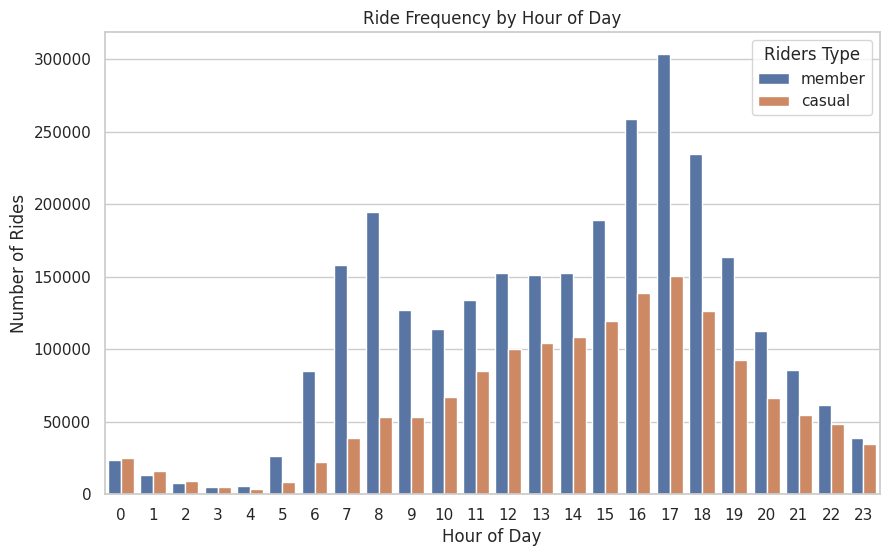

In [63]:
# Ride Frequency by Hour of Day
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='hour_of_day', hue='member_casual')
plt.title('Ride Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.legend(title='Riders Type')
plt.show()

Both casual riders and members are using bikes more frequently between 4 pm and 7 pm.

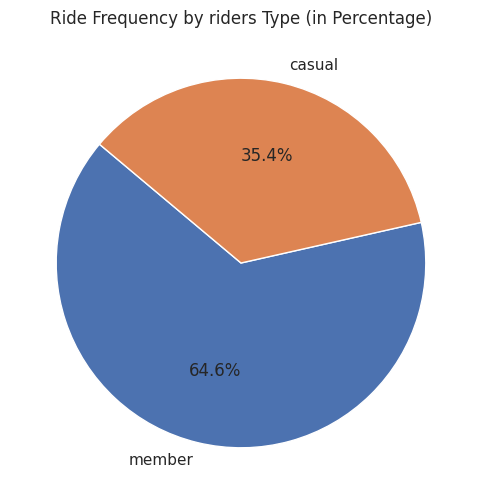

In [64]:
# Creating Pie chart to visualize Ride frequency by riders type
plt.figure(figsize=(8, 6))
plt.pie(ride_frequency_thousands, labels=ride_frequency_thousands.index, autopct='%1.1f%%', startangle=140)
plt.title('Ride Frequency by riders Type (in Percentage)')
plt.show()


In [65]:
# updated dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4331707 entries, 0 to 5719876
Data columns (total 16 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ride_id              object        
 1   rideable_type        object        
 2   started_at           datetime64[ns]
 3   ended_at             datetime64[ns]
 4   start_station_name   object        
 5   start_station_id     object        
 6   end_station_name     object        
 7   end_station_id       object        
 8   start_lat            float64       
 9   start_lng            float64       
 10  end_lat              float64       
 11  end_lng              float64       
 12  member_casual        object        
 13  ride_length_minutes  float64       
 14  day_of_week          object        
 15  hour_of_day          int32         
dtypes: datetime64[ns](2), float64(5), int32(1), object(8)
memory usage: 545.3+ MB


In [66]:
# Calculating the distance between two points using the Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):

    # Converting latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Radius of the Earth in Km
    r = 6371.0

    # Calculating the distance
    distance = r * c
    return distance

In [67]:
# Calculating distance traveled in kilometers for all rides
merged_df['distance_km'] = haversine_distance(
    merged_df['start_lat'], merged_df['start_lng'],
    merged_df['end_lat'], merged_df['end_lng'])

# the new 'distance_km' column
print(merged_df[['start_lat', 'start_lng', 'end_lat', 'end_lng', 'distance_km']])

         start_lat  start_lng    end_lat    end_lng  distance_km
0        41.924074 -87.646278  41.930000 -87.640000     0.839042
1        41.799568 -87.594747  41.809835 -87.599383     1.204573
2        42.008571 -87.690483  42.039742 -87.699413     3.543683
3        41.799568 -87.594747  41.809835 -87.599383     1.204573
4        41.799568 -87.594747  41.809835 -87.599383     1.204573
...            ...        ...        ...        ...          ...
5719872  41.874702 -87.649804  41.874640 -87.657030     0.598341
5719873  41.874754 -87.649807  41.874640 -87.657030     0.598173
5719874  41.874754 -87.649807  41.874640 -87.657030     0.598173
5719875  41.881396 -87.674984  41.885492 -87.652289     1.933195
5719876  41.874754 -87.649807  41.874640 -87.657030     0.598173

[4331707 rows x 5 columns]


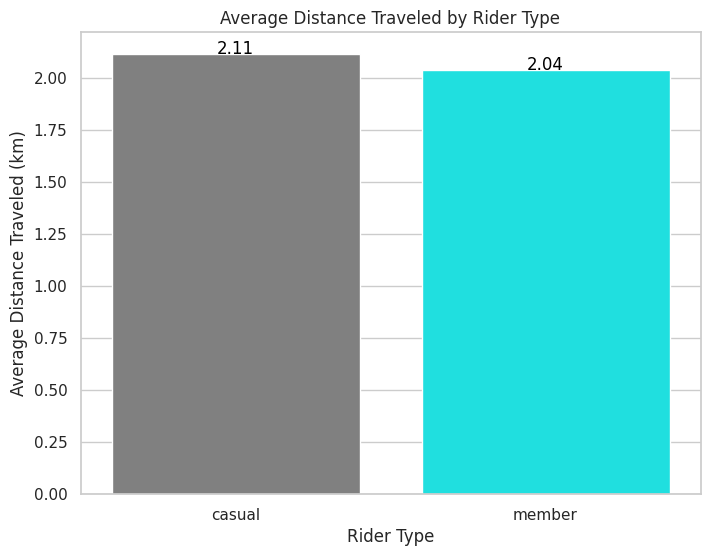

In [68]:
# Calculating average distance traveled by rider type
avg_distance_by_rider_type = merged_df.groupby('member_casual')['distance_km'].mean().reset_index()

# custom colors for 'member' and 'casual'
colors = {'member': 'cyan', 'casual': 'gray'}

# a bar plot with custom colors
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='member_casual', y='distance_km', data=avg_distance_by_rider_type, hue='member_casual', palette=colors, dodge=False)

# Adding data labels
for index, value in enumerate(avg_distance_by_rider_type['distance_km']):
    ax.text(index, value, f'{value:.2f}', color='black', ha="center")

plt.title('Average Distance Traveled by Rider Type')
plt.xlabel('Rider Type')
plt.ylabel('Average Distance Traveled (km)')
plt.legend().remove()
plt.show()

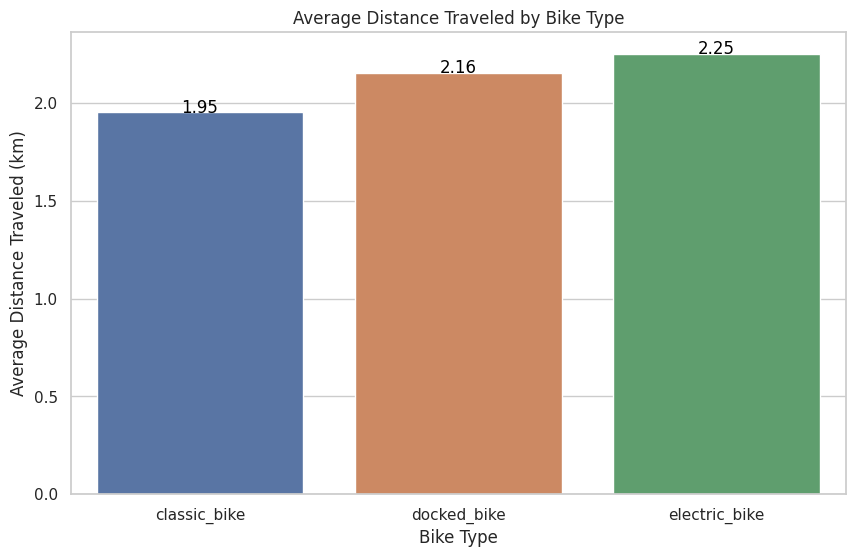

In [69]:
# Calculating average distance traveled by bike types
avg_distance_by_bike_type = merged_df.groupby('rideable_type')['distance_km'].mean().reset_index()

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='rideable_type', y='distance_km', hue='rideable_type', data=avg_distance_by_bike_type,
            dodge=False)

# Adding data labels
for index, value in enumerate(avg_distance_by_bike_type['distance_km']):
    plt.text(index, value, f'{value:.2f}', color='black', ha="center")

plt.title('Average Distance Traveled by Bike Type')
plt.xlabel('Bike Type')
plt.ylabel('Average Distance Traveled (km)')
plt.show()

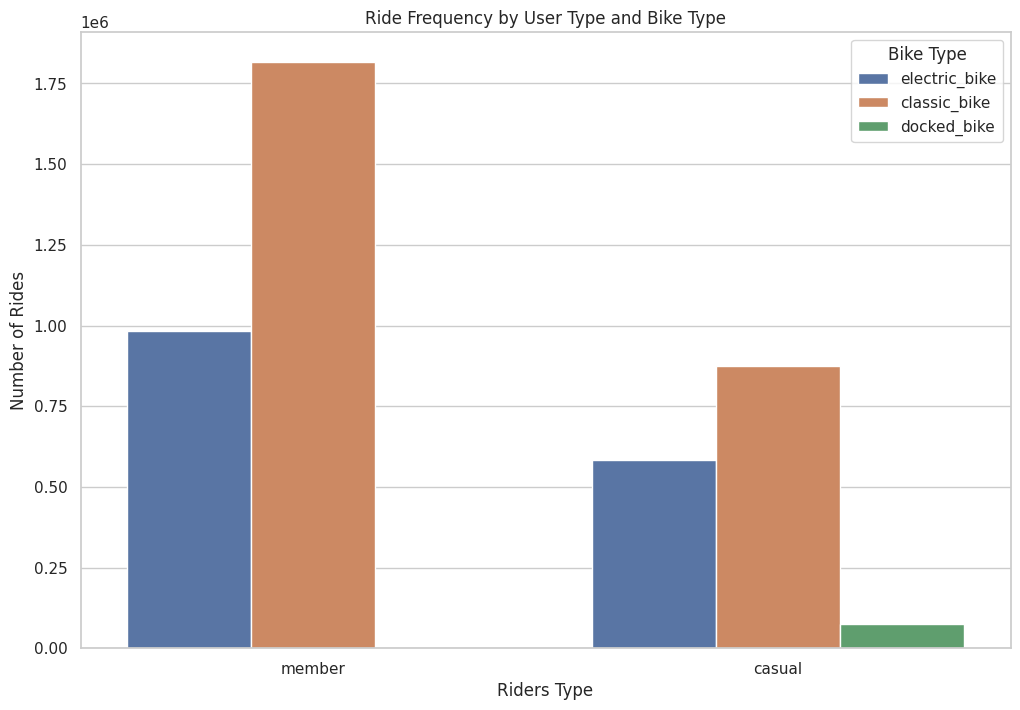

In [70]:
# the plotting style
sns.set(style="whitegrid")

# Graph for ride frequency by riders type and bike type
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_df, x='member_casual', hue='rideable_type')
plt.title('Ride Frequency by User Type and Bike Type')
plt.xlabel('Riders Type')
plt.ylabel('Number of Rides')
plt.legend(title='Bike Type')
plt.show()


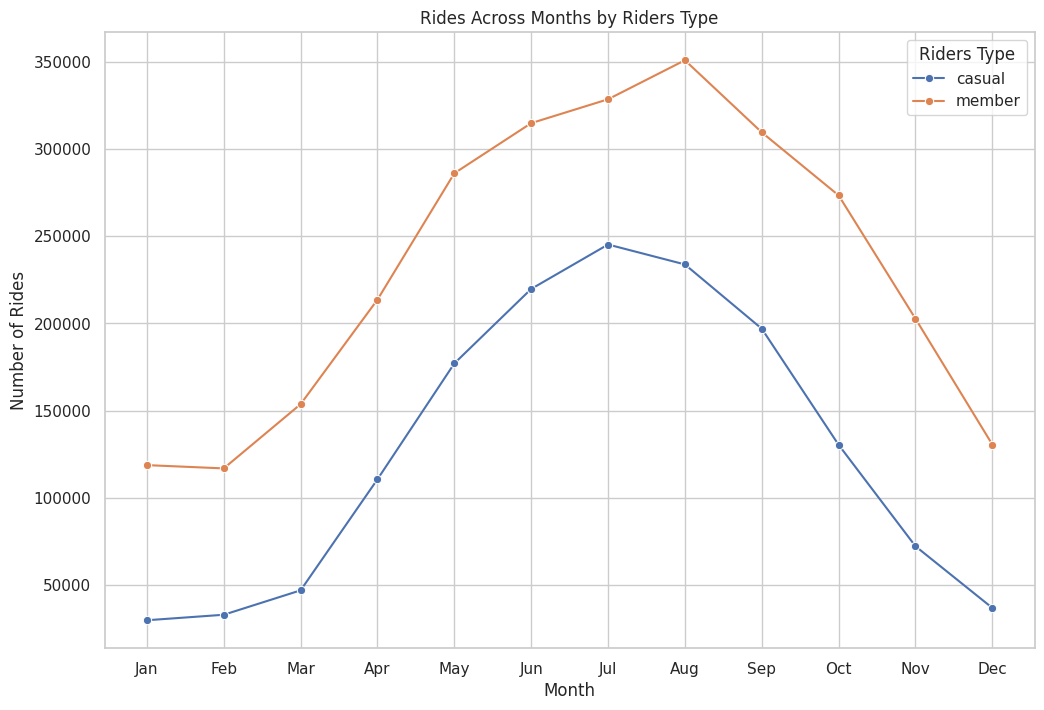

In [71]:
# month from started_at column
merged_df['month'] = merged_df['started_at'].dt.month

# Group the data by month and user type, and counting the number of rides
rides_by_month_and_user = merged_df.groupby(['month', 'member_casual'])['ride_id'].count().reset_index()

# a line plot for rides across months for different user types
plt.figure(figsize=(12, 8))
sns.lineplot(data=rides_by_month_and_user, x='month', y='ride_id', hue='member_casual', marker='o')
plt.title('Rides Across Months by Riders Type')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Riders Type')
plt.show()

Both Casual and member riders uses bike more frequently in month like May,Jun,July and August.

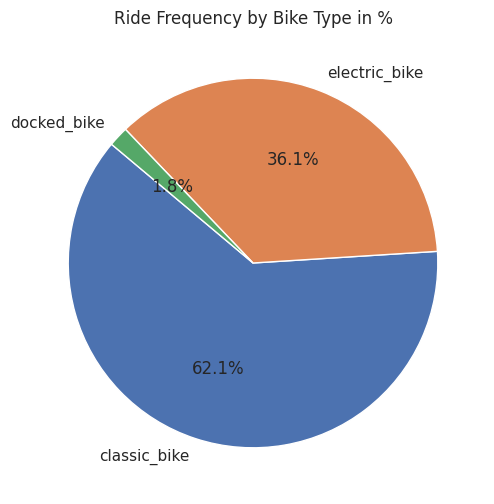

In [72]:
# ride frequency by bike type
ride_frequency_by_bike_type = merged_df['rideable_type'].value_counts()

# pie chart for bike type
plt.figure(figsize=(8, 6))
plt.pie(ride_frequency_by_bike_type, labels=ride_frequency_by_bike_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Ride Frequency by Bike Type in %')
plt.show()


About 62% customers prefers Classic Bike.

In [73]:
# updated dataset after analysis
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4331707 entries, 0 to 5719876
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ride_id              object        
 1   rideable_type        object        
 2   started_at           datetime64[ns]
 3   ended_at             datetime64[ns]
 4   start_station_name   object        
 5   start_station_id     object        
 6   end_station_name     object        
 7   end_station_id       object        
 8   start_lat            float64       
 9   start_lng            float64       
 10  end_lat              float64       
 11  end_lng              float64       
 12  member_casual        object        
 13  ride_length_minutes  float64       
 14  day_of_week          object        
 15  hour_of_day          int32         
 16  distance_km          float64       
 17  month                int32         
dtypes: datetime64[ns](2), float64(6), int32(2), object(8)
memory usage:

In [74]:
# Save the DF to a CSV
merged_df.to_csv('merged_data.csv', index=False)

In [75]:
# Save the dataset to a CSV file
file_path = '/content/drive/MyDrive/merged_df.csv'
merged_df.to_csv(file_path, index=False)

# **Act**
Recommendations based on analysis


1. **Weekend Promotions**:
Since casual riders tend to use bikes for fun on weekends, offer special weekend promotions or discounts to encourage them to become members. Highlight the benefits of membership, such as lower rates or priority access, especially during weekends.
2. **Evening Offers**: As both casual riders and members use bikes more frequently between 4 pm and 7 pm, introduce incentives targeted at these peak usage times. This could include discounted rates or exclusive member-only perks for rides during these hours.

1. **Seasonal Membership Offers**: Given that both casual and member riders use bikes more frequently in months like May, June, July, and August, create seasonal membership offers or packages. These could provide better value for money during peak riding seasons, making membership more appealing to casual riders.
2. **Bike Preference Promotions**: Since about 62% of customers prefer classic bikes, promote the benefits of classic bikes to casual riders. Showcase their comfort, reliability, and ease of use, and offer exclusive deals or discounts on classic bike rentals for members to incentivize them to switch.







